In [115]:
# Importing some basic libraries

In [33]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [116]:
# Loading our dataset

In [34]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [35]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


So in our dataset we have 1470 entries and 35 columns

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

So there is no null values present and we have some categorical columns that need to be converted 

In [117]:
# checking the distribution of our target column

In [37]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

So our target variable is quite imbalanced 

In [38]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64


Attrition
No     1233
Yes     237
Name: count, dtype: int64


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6

In [39]:
df['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

so it is a constant column that is of no use 

In [40]:
df['EmployeeNumber'].value_counts().nunique()

1

so it is a constant column that is of no use 

In [118]:
# dropping these columns

In [41]:
df.drop('EmployeeCount',axis=1,inplace=True)

In [42]:
df.drop('EmployeeNumber',axis=1,inplace=True)

In [43]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [44]:
# checking for duplicate columns. if present the drop this column
df1=df.T.drop_duplicates().T
print(df1)

     Age Attrition     BusinessTravel DailyRate              Department  \
0     41       Yes      Travel_Rarely      1102                   Sales   
1     49        No  Travel_Frequently       279  Research & Development   
2     37       Yes      Travel_Rarely      1373  Research & Development   
3     33        No  Travel_Frequently      1392  Research & Development   
4     27        No      Travel_Rarely       591  Research & Development   
...   ..       ...                ...       ...                     ...   
1465  36        No  Travel_Frequently       884  Research & Development   
1466  39        No      Travel_Rarely       613  Research & Development   
1467  27        No      Travel_Rarely       155  Research & Development   
1468  49        No  Travel_Frequently      1023                   Sales   
1469  34        No      Travel_Rarely       628  Research & Development   

     DistanceFromHome Education EducationField EnvironmentSatisfaction  \
0                   1    

In [45]:
df=df1

In [46]:
# Dropping all the duplicate rows
df.drop_duplicates(inplace=True)

In [47]:
#transforming datatypes from object to numeric datatype by using OrdianlEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

In [48]:
for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [49]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,18.923810,0.161224,1.607483,443.074830,1.260544,8.192517,1.912925,2.247619,1.721769,0.600000,...,1.712245,0.0,0.793878,11.278231,2.799320,1.761224,6.991156,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,253.513199,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,1.081209,0.0,0.852077,7.775842,1.289271,0.706476,6.053027,3.623137,3.222430,3.568136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,1.000000,225.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.0,0.000000,6.000000,2.000000,1.000000,3.000000,2.000000,0.000000,2.000000
50%,18.000000,0.000000,2.000000,447.000000,1.000000,6.000000,2.000000,2.000000,2.000000,1.000000,...,2.000000,0.0,1.000000,10.000000,3.000000,2.000000,5.000000,3.000000,1.000000,3.000000
75%,25.000000,0.000000,2.000000,660.000000,2.000000,13.000000,3.000000,3.000000,3.000000,1.000000,...,3.000000,0.0,1.000000,15.000000,3.000000,2.000000,9.000000,7.000000,3.000000,7.000000
max,42.000000,1.000000,2.000000,885.000000,2.000000,28.000000,4.000000,5.000000,3.000000,1.000000,...,3.000000,0.0,3.000000,39.000000,6.000000,3.000000,36.000000,18.000000,15.000000,17.000000


In [119]:
# Lets check the distribution by plotting the distplot

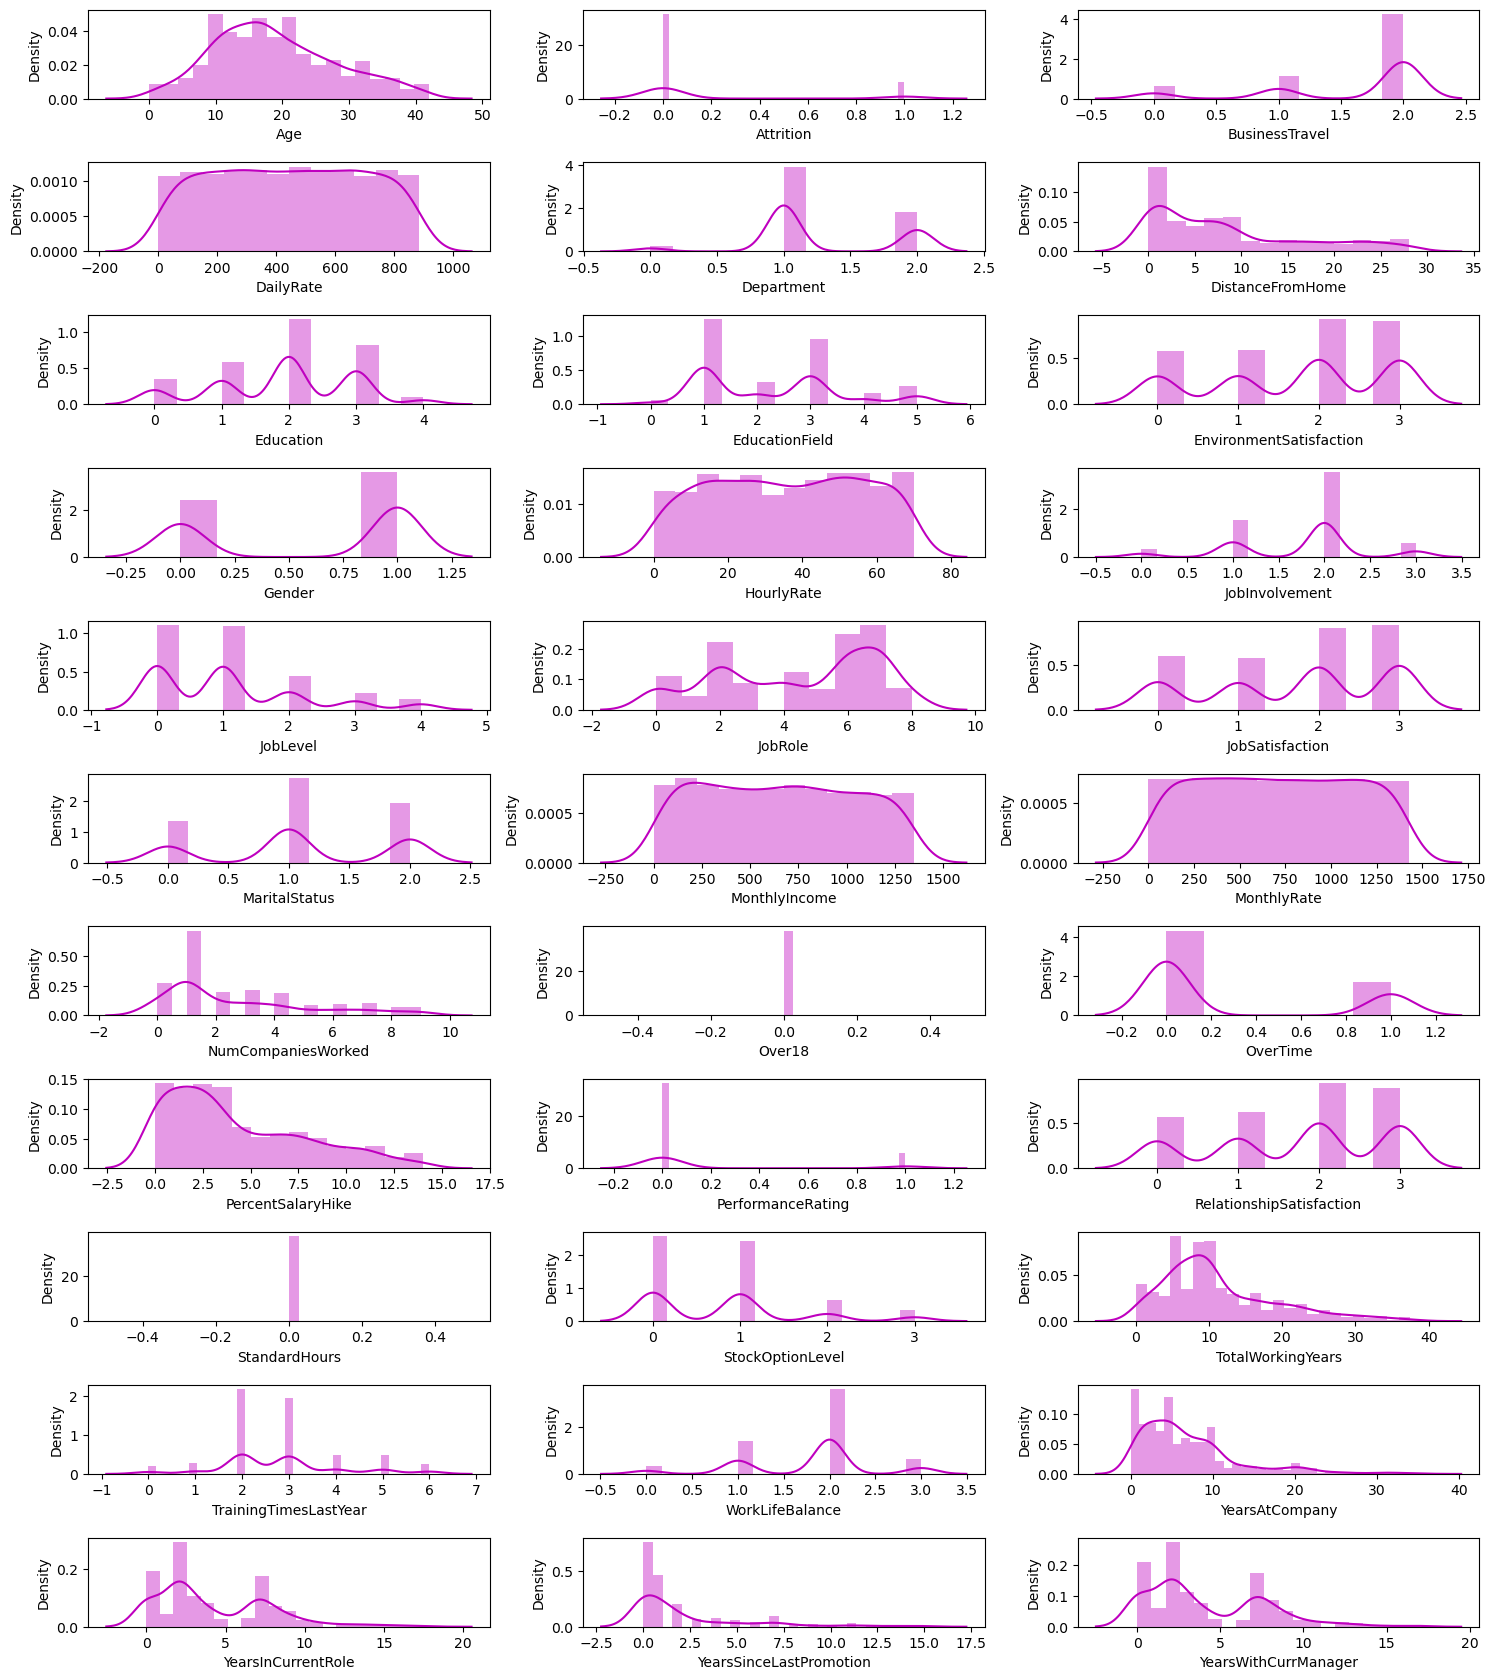

In [50]:
plt.figure(figsize=(15,18),facecolor='white')
p=1
for i in df.columns:
    if p<=34:
        ax=plt.subplot(12,3,p)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
    p+=1
plt.tight_layout()

So here we can see that few columns has skewness present. that need to be removed or we can use some tree based models for evaluation

In [120]:
# Creating the boxplot to check the outliers

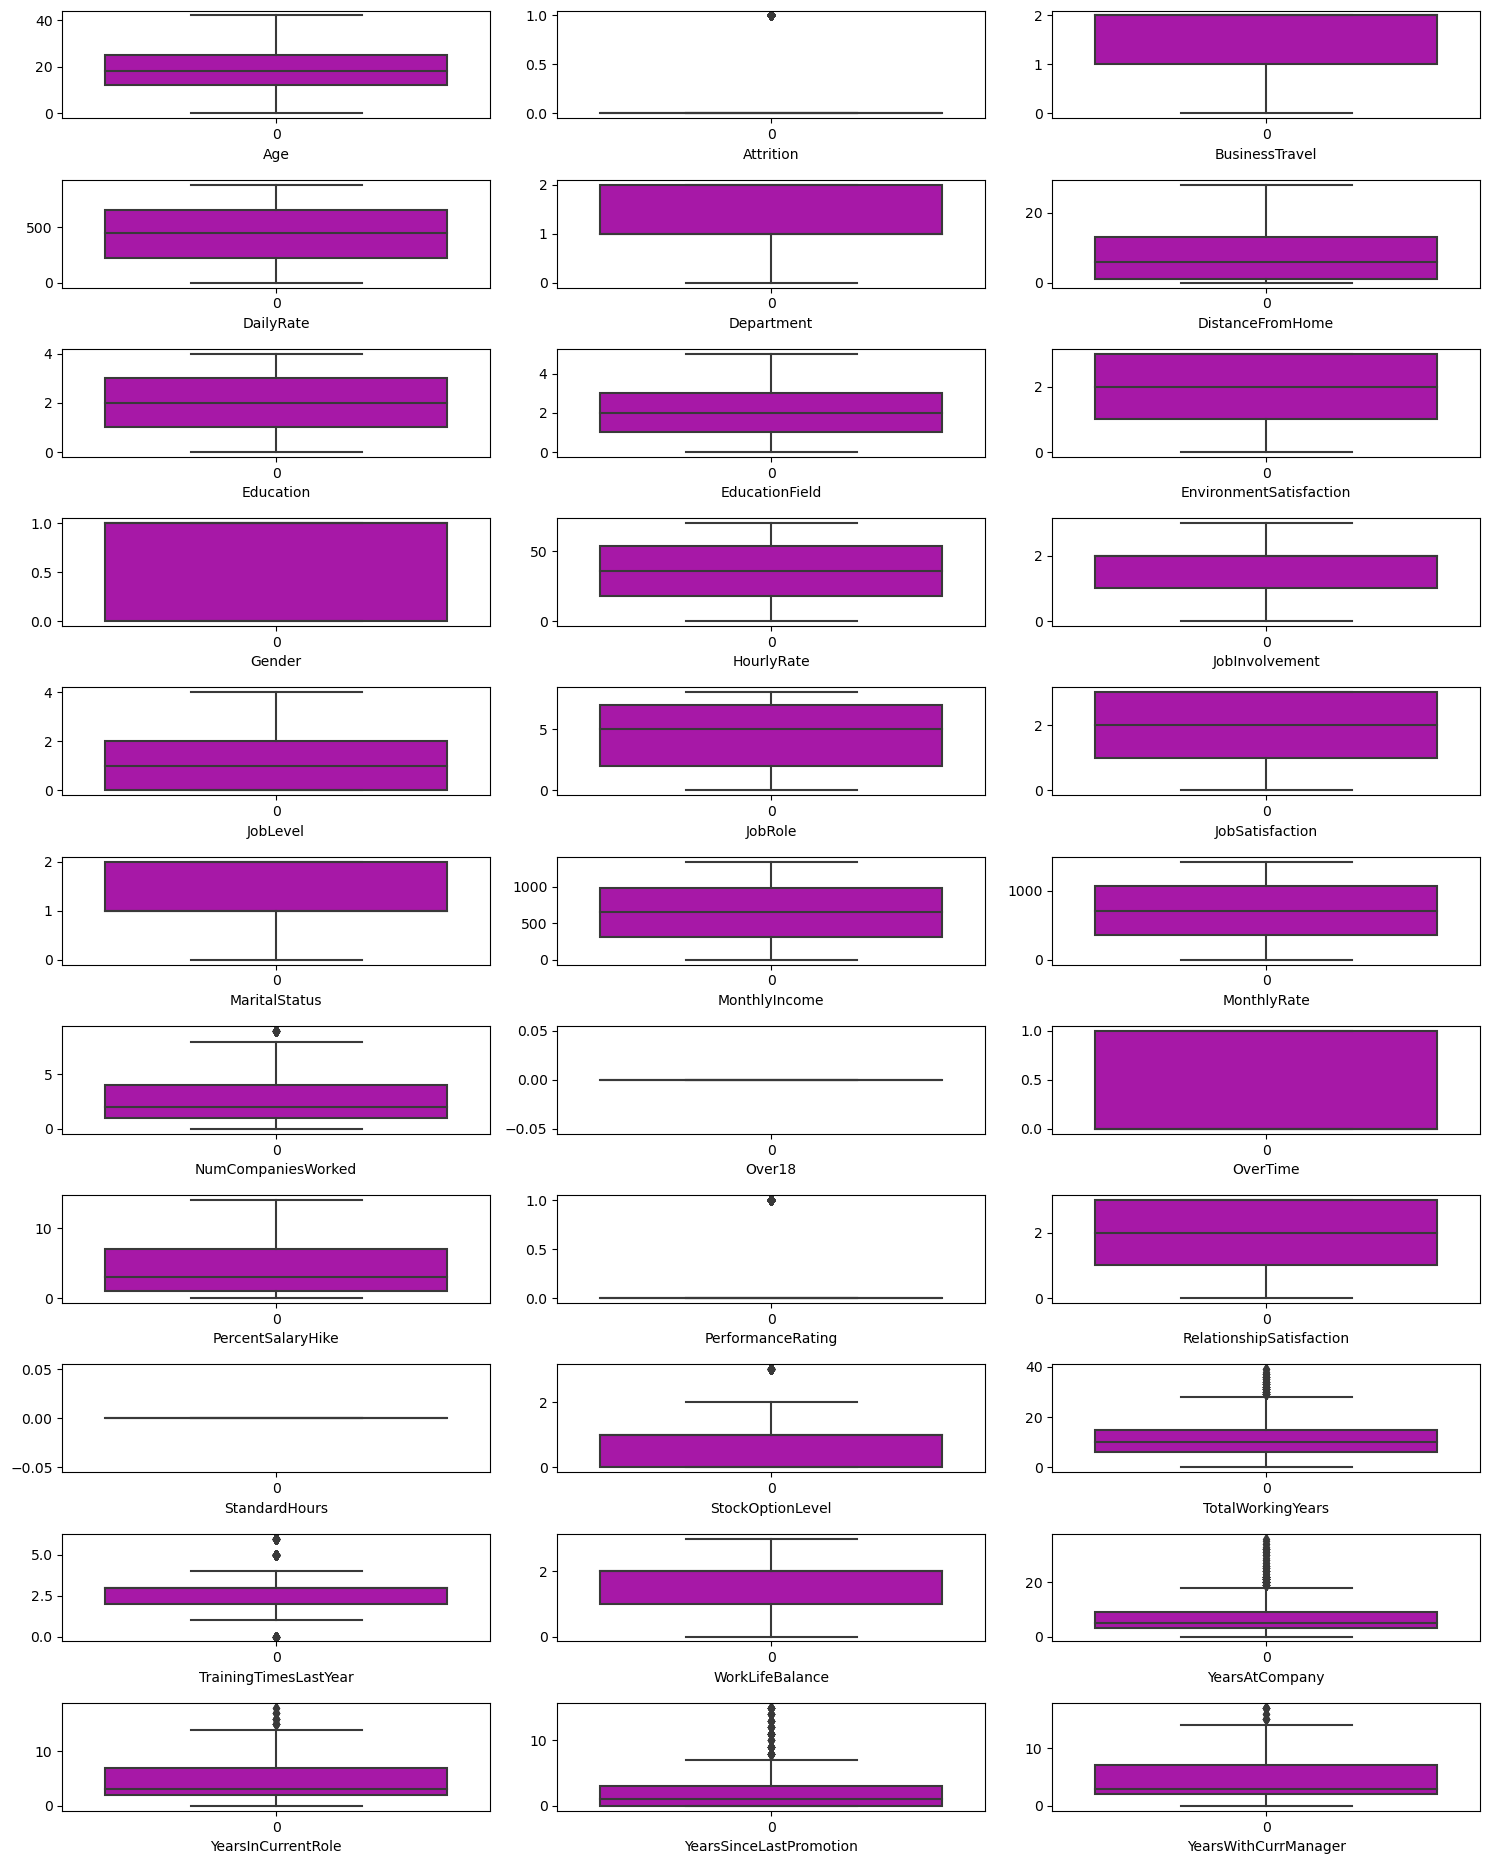

In [51]:
plt.figure(figsize=(15,20),facecolor='white')
p=1
for i in df.columns:
    if p<=34:
        ax=plt.subplot(12,3,p)
        sns.boxplot(df[i],color='m')
        plt.xlabel(i)
    p+=1
plt.tight_layout()

so Totalworkingyears,yearsatcompany,yearssincelastpromotion and yearswithcurrmanager has some outliers present

In [1]:
# Checking for the correlation values 

In [54]:
corr = df.corr()
corr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010557,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.053535,NaN,0.037510,0.680409,-0.019621,-0.021490,0.309796,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056605,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,-0.045872,NaN,-0.137145,-0.171571,-0.059478,-0.063939,-0.136932,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004103,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.035986,NaN,-0.016727,0.034144,0.015240,-0.011256,-0.014720,-0.011497,-0.032591,-0.022636
DailyRate,0.010557,-0.056605,-0.004103,1.000000,0.007796,-0.004738,-0.016550,0.038129,0.018462,-0.011194,...,0.008530,NaN,0.041786,0.014877,0.002227,-0.037791,-0.032461,0.010997,-0.033431,-0.025849
Department,-0.031882,0.063991,-0.009044,0.007796,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.022414,NaN,-0.012193,-0.015685,0.036875,0.026383,0.023308,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004738,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.006557,NaN,0.044872,0.004560,-0.036942,-0.026556,0.009038,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016550,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.009118,NaN,0.018422,0.148188,-0.025100,0.009819,0.067737,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.038129,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.004378,NaN,-0.016185,-0.027833,0.049195,0.041191,-0.018987,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018462,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,0.007665,NaN,0.003432,-0.002900,-0.019359,0.027627,0.000657,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011194,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,0.022868,NaN,0.012716,-0.046875,-0.038787,-0.002753,-0.030797,-0.041483,-0.026985,-0.030599


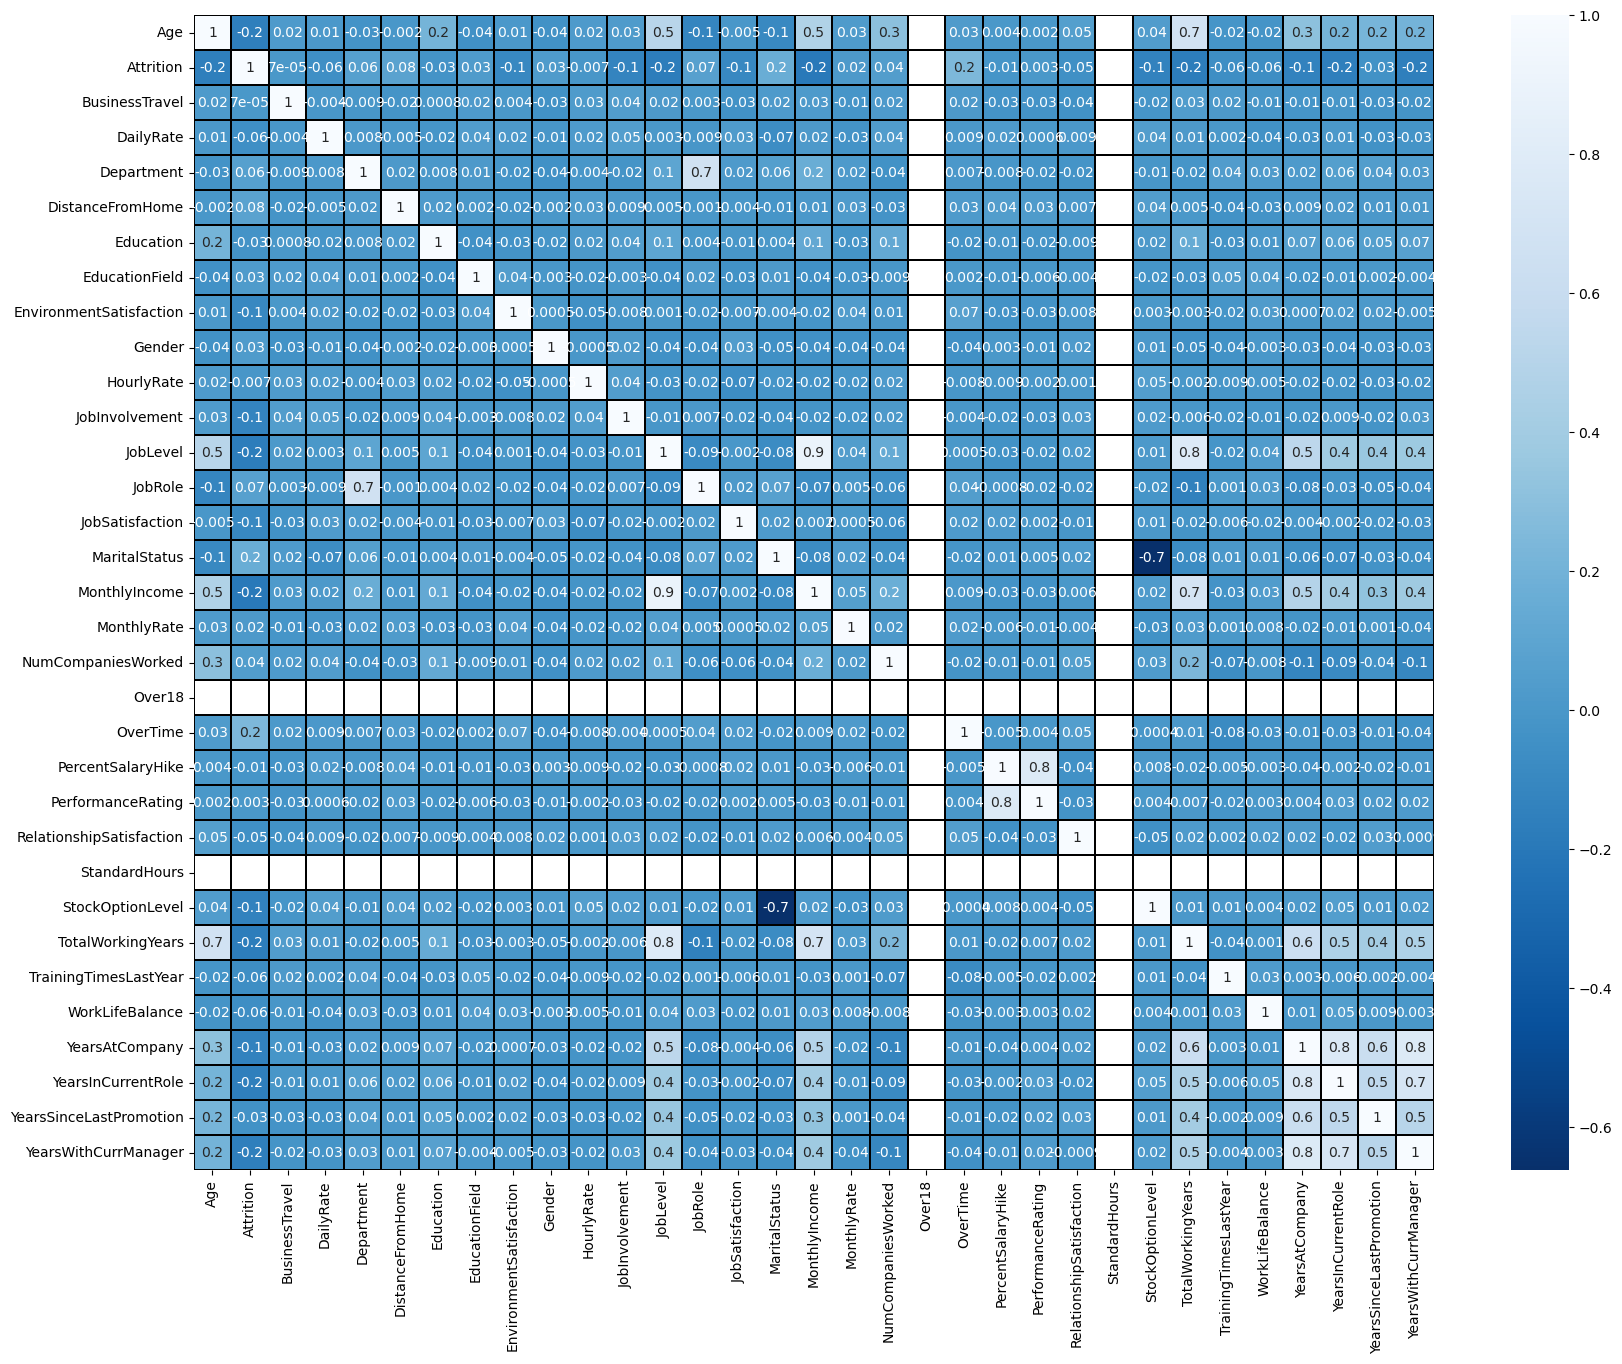

In [56]:
# visualization of correlation by heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(corr,linewidths = .1,fmt='.1g',linecolor = 'black',annot = True,cmap = 'Blues_r')
plt.yticks(rotation =0)
plt.show()

In [57]:
corr['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015273
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056605
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.136932
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
Y

So Most of the columns are very slightly Correlated with the target column

In [122]:
# Separating x and y

In [68]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [123]:
# Using standard scaling 

In [69]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [70]:
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.713914,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,...,-1.584178,0.0,-0.932014,-0.421735,-2.171982,-2.493820,-0.163801,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.302446,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,...,1.191438,0.0,0.241988,-0.164441,0.155707,0.338096,0.497250,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.428124,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,...,-0.658973,0.0,-0.932014,-0.550382,0.155707,0.338096,-1.155378,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.487313,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,...,0.266233,0.0,-0.932014,-0.421735,0.155707,0.338096,0.166724,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.517210,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,...,1.191438,0.0,0.241988,-0.679030,0.155707,0.338096,-0.824853,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.200946,-0.493817,1.703764,-0.891688,0.565311,0.254625,0.816497,-1.224807,...,0.266233,0.0,0.241988,0.736090,0.155707,0.338096,-0.329064,-0.615492,-0.679146,-0.314873
1466,0.227347,0.590048,-0.458021,-0.493817,-0.393938,-1.868426,0.565311,1.169781,0.816497,-1.175601,...,-1.584178,0.0,0.241988,-0.293088,1.707500,0.338096,0.001462,0.764998,-0.368715,0.806541
1467,-1.086676,0.590048,-1.594443,-0.493817,-0.640727,0.085049,-0.937414,-0.660531,0.816497,1.038693,...,-0.658973,0.0,0.241988,-0.679030,-2.171982,0.338096,-0.163801,-0.615492,-0.679146,-0.314873
1468,1.322365,-0.913194,0.536349,1.401512,-0.887515,0.085049,0.565311,1.169781,0.816497,-0.142264,...,1.191438,0.0,-0.932014,0.736090,0.155707,-1.077862,0.331987,0.488900,-0.679146,1.086895


In [124]:
# ckecking multicolinearity by using VIF method

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# checking the VIF 
ds=pd.DataFrame()
ds['Columns']=x.columns
ds['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
ds

,Columns,vif
0,Age,2.051592
1,BusinessTravel,1.015136
2,DailyRate,1.024073
3,Department,1.972415
4,DistanceFromHome,1.012455
5,Education,1.067304
6,EducationField,1.016273
7,EnvironmentSatisfaction,1.018799
8,Gender,1.019056
9,HourlyRate,1.019933


So here not that much multi colinearity present

In [73]:
df.Attrition.value_counts()

Attrition
0.0    1233
1.0     237
Name: count, dtype: int64

SO our target classes are imbalanced. so we have to balance our classes

In [2]:
# Using SMOTE technique to balance

In [74]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [75]:
y1.value_counts()

Attrition
1.0    1233
0.0    1233
Name: count, dtype: int64

Now our calsses are properly balanced

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [126]:
# Using Variance Thresold technique for feature selection purpose

In [78]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.5)

In [79]:
sel.fit(x_train)

VarianceThreshold(threshold=0.5)

In [80]:
sum(sel.get_support())

30

SO now we have 30 columns after using thresold value is 0.5

In [81]:
columns = x_train.columns[sel.get_support()]

In [82]:
columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [83]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [127]:
# Transforming x_train and x_test for the new columns

In [84]:
x_train_new = sel.transform(x_train)
x_test_new = sel.transform(x_test)

x_train_new1 = pd.DataFrame(x_train_new,columns=columns)
x_test_new1 = pd.DataFrame(x_test_new,columns=columns)

In [85]:
x_train_new1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-1.196177,0.590048,-0.836828,-0.493817,1.827158,0.085049,2.068035,0.254625,0.816497,0.005356,...,-0.42623,-0.658973,-0.932014,-1.322266,0.155707,-2.493820,-0.990115,-1.167687,-0.679146,-1.155935
1,0.884358,0.590048,1.625420,-0.493817,2.444129,0.085049,2.068035,-0.660531,0.816497,-0.535916,...,-0.42623,1.191438,1.415991,-0.164441,0.931603,1.754054,-0.659590,-0.891589,-0.368715,-0.595227
2,1.212863,0.590048,0.729698,-0.493817,0.716610,1.061787,1.316673,0.254625,-1.224745,-0.043851,...,-0.42623,1.191438,0.241988,-0.164441,0.155707,-1.077862,0.166724,-0.615492,1.493867,0.526188
3,1.969398,0.590048,-0.153835,-0.493817,-0.889121,0.072334,0.545749,1.134041,0.816497,0.608645,...,-0.42623,1.191438,0.226706,1.634945,-0.620189,0.338096,-0.337669,-0.622680,-0.372756,-0.049118
4,-1.782823,-0.913194,-0.158325,1.401512,-1.010909,-1.868426,2.068035,-1.248606,-1.224745,1.637964,...,0.06920,-0.064439,-0.932014,-1.110950,0.433015,0.591130,-0.748188,-0.714170,-0.424190,-0.695427


In [128]:
# Now using SequentialFeatureSelector technique for further feature selection

In [86]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [129]:
# Using Random Forest Classifier for our base model

In [87]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier()

In [88]:
sfs = SFS(RFC, k_features='best', forward=True, floating=False, scoring='accuracy',cv=5,n_jobs=-1)
sfs.fit(x_train_new1, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(),
                          k_features=(1, 30), n_jobs=-1, scoring='accuracy')

In [89]:
sfs.k_feature_idx_

(0, 1, 2, 3, 7, 8, 9, 10, 11, 13, 17, 18, 20, 21, 22, 23, 24, 26, 27)

so These are the best columns for predicting the attrition by SFS technique

In [90]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T


metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(23,)","[0.8658227848101265, 0.8430379746835444, 0.873...",0.859031,"(TotalWorkingYears,)",0.013042,0.010147,0.005073
2,"(1, 23)","[0.8455696202531645, 0.8607594936708861, 0.860...",0.858017,"(BusinessTravel, TotalWorkingYears)",0.008601,0.006692,0.003346
3,"(1, 11, 23)","[0.8683544303797468, 0.8481012658227848, 0.857...",0.855981,"(BusinessTravel, JobLevel, TotalWorkingYears)",0.009124,0.007099,0.003549
4,"(1, 7, 11, 23)","[0.8531645569620253, 0.8405063291139241, 0.860...",0.855485,"(BusinessTravel, EnvironmentSatisfaction, JobL...",0.011655,0.009068,0.004534
5,"(1, 7, 11, 18, 23)","[0.8734177215189873, 0.850632911392405, 0.8781...",0.871206,"(BusinessTravel, EnvironmentSatisfaction, JobL...",0.013417,0.010439,0.005219
6,"(1, 7, 11, 18, 23, 24)","[0.8835443037974684, 0.8759493670886076, 0.888...",0.885909,"(BusinessTravel, EnvironmentSatisfaction, JobL...",0.008354,0.0065,0.00325
7,"(1, 7, 11, 18, 22, 23, 24)","[0.9063291139240506, 0.9037974683544304, 0.913...",0.902127,"(BusinessTravel, EnvironmentSatisfaction, JobL...",0.010277,0.007996,0.003998
8,"(1, 7, 11, 18, 22, 23, 24, 26)","[0.9088607594936708, 0.9088607594936708, 0.923...",0.908722,"(BusinessTravel, EnvironmentSatisfaction, JobL...",0.01238,0.009632,0.004816
9,"(1, 7, 8, 11, 18, 22, 23, 24, 26)","[0.9164556962025316, 0.9164556962025316, 0.906...",0.909729,"(BusinessTravel, EnvironmentSatisfaction, Gend...",0.008763,0.006818,0.003409
10,"(1, 3, 7, 8, 11, 18, 22, 23, 24, 26)","[0.9291139240506329, 0.9164556962025316, 0.921...",0.91683,"(BusinessTravel, Department, EnvironmentSatisf...",0.010259,0.007982,0.003991


In [91]:
from sklearn.model_selection import cross_val_score

In [130]:
# transforming x_train and x_test again for the new columns

In [92]:
x_train_new2 = sfs.transform(x_train_new1)
x_test_new2 = sfs.transform(x_test_new1)

model = RandomForestClassifier()

print("training",np.mean(cross_val_score(model, x_train_new2, y_train, cv=5, scoring='accuracy')))
print("testing",np.mean(cross_val_score(model, x_test_new2, y_test, cv=5, scoring='accuracy')))

training 0.9315401914797918
testing 0.8523397237682951


In [93]:
x_train_new2

array([[-1.19617737,  0.59004834, -0.83682823, ...,  0.15570708,
        -0.99011546, -1.16768726],
       [ 0.88435781,  0.59004834,  1.62541972, ...,  0.93160339,
        -0.6595898 , -0.89158942],
       [ 1.21286336,  0.59004834,  0.72969811, ...,  0.15570708,
         0.16672434, -0.61549158],
       ...,
       [-0.2106607 ,  0.59004834, -0.09894303, ...,  0.15570708,
         0.49724999,  1.3171933 ],
       [ 0.4463504 ,  0.59004834, -0.89601688, ...,  0.15570708,
        -0.6595898 , -0.61549158],
       [-1.63418477, -0.91319439,  1.1124514 , ...,  1.70749969,
        -1.15537829, -1.16768726]])

In [131]:
# Importing metrices 

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [132]:
# Importing some basic classification algorithmns

In [95]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [133]:
# Creating their instances

In [96]:
RFC=RandomForestClassifier(n_jobs=-1)
ET=ExtraTreesClassifier(n_jobs=-1)
LR=LogisticRegression(n_jobs=-1)
svc=SVC()
GBC=GradientBoostingClassifier()
ADC=AdaBoostClassifier()
BC=BaggingClassifier(n_jobs=-1)
DTC=DecisionTreeClassifier()
KNN=KNeighborsClassifier(n_jobs=-1)
MNB=MultinomialNB()
GNB=GaussianNB()

In [97]:
loop = [RFC,ET,LR,svc,GBC,ADC,BC,DTC,KNN,GNB]

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
from sklearn.metrics import roc_auc_score

In [134]:
# Running a loop to train all the models separately and checking the corresponding metrices. And compare these metrices with the cross_val_score 

In [100]:
for i in loop:
    i.fit(x_train_new2,y_train)
    pred=i.predict(x_test_new2)
    print('This is for :',i)
    print('accuracy will be :',accuracy_score(y_test,pred))
    print('confusion matrix will be :','\n')
    print(confusion_matrix(y_test,pred))
    print('classification report will be :','\n')
    print(classification_report(y_test,pred))
    
    score= cross_val_score(i,x_train,y_train,cv=5)
    print('Cross val score will be :',score)
    print('Mean cv :',score.mean())
    print('Difference between cv and accuracy_score will be :',accuracy_score(y_test,pred)-score.mean())
    print('\n')
    

This is for : RandomForestClassifier(n_jobs=-1)
accuracy will be : 0.9311740890688259
confusion matrix will be : 

[[238  12]
 [ 22 222]]
classification report will be : 

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       250
         1.0       0.95      0.91      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494

Cross val score will be : [0.94936709 0.93924051 0.94416244 0.91116751 0.93401015]
Mean cv : 0.9355895392919102
Difference between cv and accuracy_score will be : -0.004415450223084316


This is for : ExtraTreesClassifier(n_jobs=-1)
accuracy will be : 0.9554655870445344
confusion matrix will be : 

[[236  14]
 [  8 236]]
classification report will be : 

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       250
         1.0       0.94      0.97  

So our best model is ExtraTrees classifier. Because it has a accuracy score of 95.5% and also the difference between the cross_val_score and the accuracy_score is 0.0011.

In [135]:
# Importing Grid search CV for Hyper parameter tuning

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
# Setting the best parameter for that algorithmn

In [103]:
parameters = {'n_estimators':[100,150,200],'criterion':['gini','entropy','log_loss'],'n_jobs':[-1],'max_leaf_nodes':[2,4,5,None],'max_depth':[2,3,4,5,None]}

In [104]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5,n_jobs=-1)

In [105]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, None],
                         'max_leaf_nodes': [2, 4, 5, None],
                         'n_estimators': [100, 150, 200], 'n_jobs': [-1]})

In [106]:
# checking for the best parameters obtained by gridsearchCV

In [107]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_leaf_nodes': None,
 'n_estimators': 150,
 'n_jobs': -1}

In [108]:
# Creating our final model based on the best parameters

In [109]:
final_model = ExtraTreesClassifier(criterion = "gini",max_depth=None,max_leaf_nodes=None,n_estimators=150,n_jobs=-1)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

96.76113360323887


so our final accuracy will be 96.76%

In [110]:
# Lets save our model
import joblib
filename = 'Hr_attrition.pkl'
joblib.dump(final_model, filename)
model = joblib.load(filename)

In [111]:
#Plotting Roc_auc plot for our model

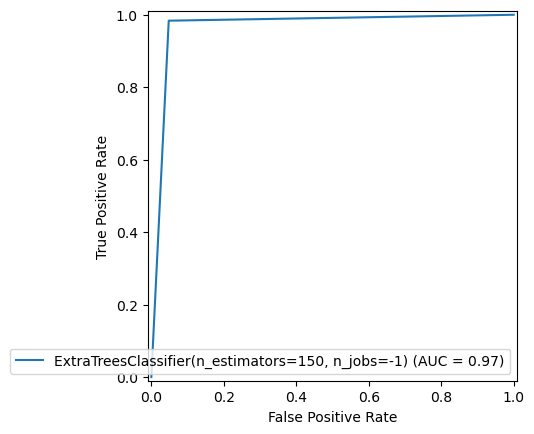

In [112]:
from sklearn import metrics
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [113]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,pred)
auc_score

0.9678032786885246

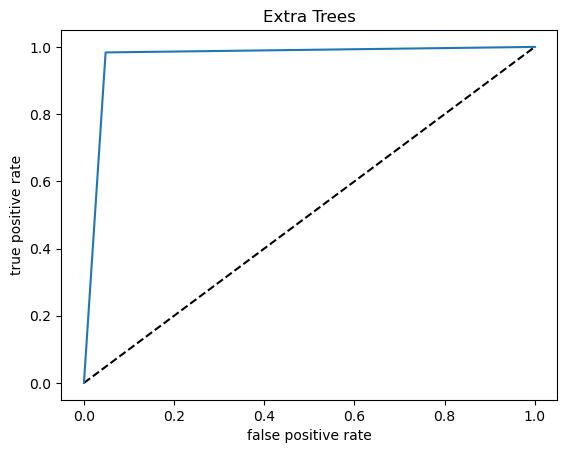

In [114]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ExtraTreesClassifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Extra Trees')
plt.show()